## Introduction to EIT

Electromagnetically induced transparency (EIT) is one of the more recently discovered a nonlinear optical phenomena. It is a nonlinear process that allows an otherwise opaque medium to become transparent.  Here is an energy level diagram:

<div>
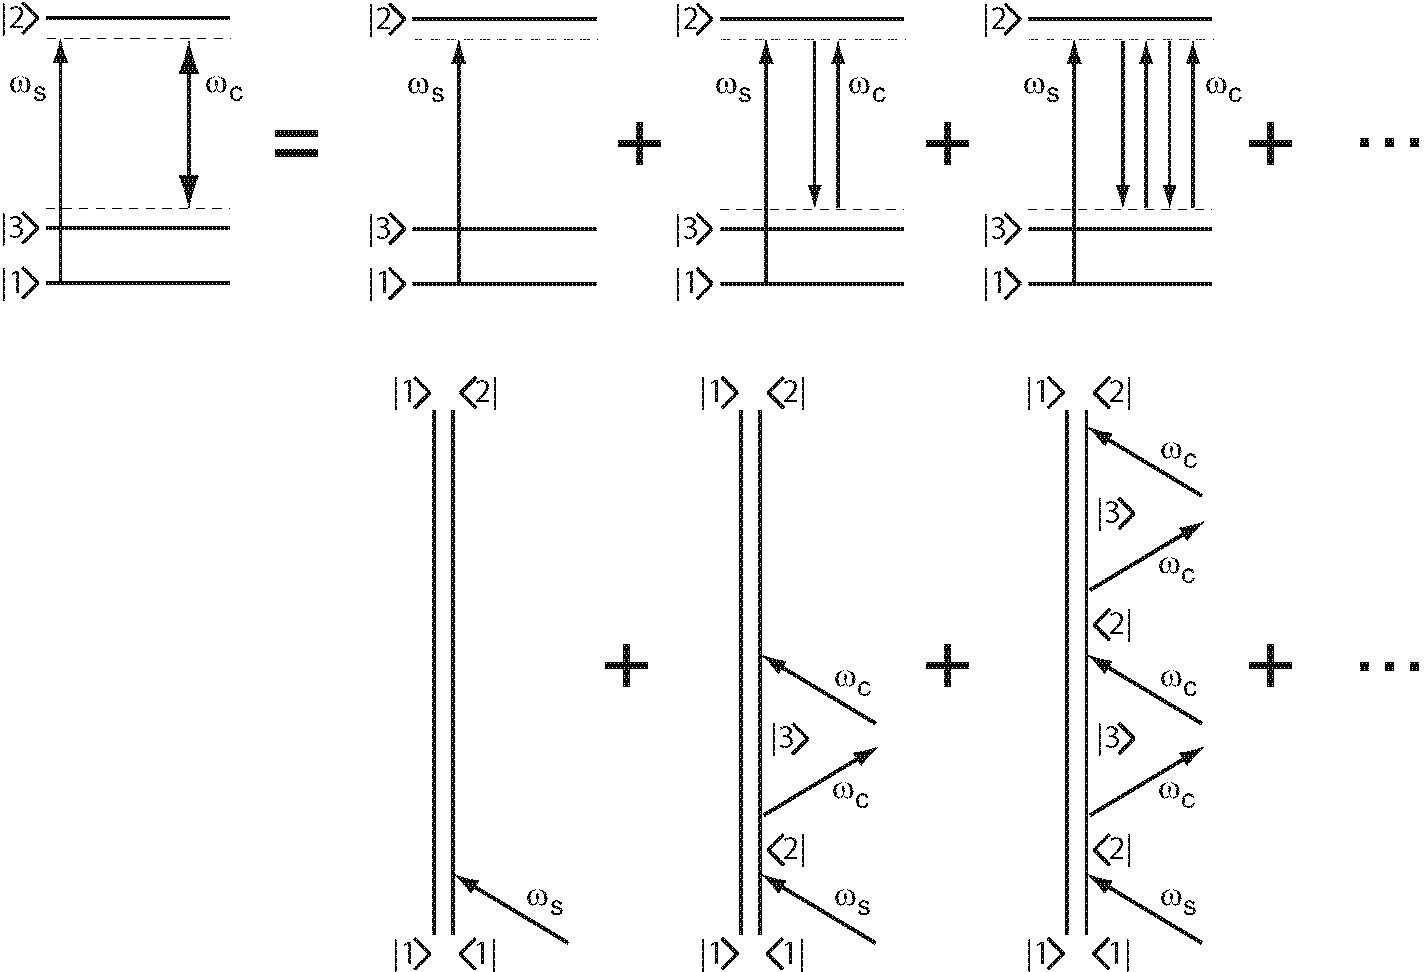
</div>

In EIT, we consider a 3-level atom in what is known as the the $\Lambda$ configuration.  A weak signal beam at frequency $\omega_s$ connects states $|1\rangle$ to state $|2\rangle$, and is strongly absorbed as a result.  However, when a strong coupling beam is applied that connects states $|2\rangle$ to state $|3\rangle$, the absorption of the signal beam vanishes!  How can this be?

To understand what's going on, we need to calculate the polarization of the medium oscillating at $\omega_s$.  The key insight is to realize that all odd orders of the susceptibility contribute, and each term can be represented as an energy level diagram in which an electron starts in state $|1\rangle$ and ends up in state $|2\rangle$.  The linear susceptibility $\chi^{(1)}(\omega_s)$ corresponds to a single-photon transition from. $|1\rangle$ to $|2\rangle$. The third order susceptibility corresponds to the electron being promoted from $|1\rangle$ to $|2\rangle$, transitioning from $|2\rangle$ to state $|3\rangle$ via stimulated emission, and then being promoted again up to state $|3\rangle$.  This same process repeats and is responsible for all odd orders participating.  This extra coupling to state $|3\rangle$ is what provides the transparency.

## Calculation of EIT Polarization
The steady state polarization at the
signal frequency may be found by summing the polarizations induced by all possible excitation pathways from state $|1\rangle$ to state
$|3\rangle$, which can also be represented using double-sided Feynman
diagrams as shown in the figure.   

\begin{align}
P_{s} &=  N \mu_{12}\Omega_s\frac{1}{\tilde{\Delta}_s}
\sum_{n=0}^\infty \left(\frac{\Omega_c^2}{4\tilde{\Delta}_s\tilde{\Delta}_R} \right)^n \nonumber \\
&= N \mu_{12}\Omega_s \frac{1}{\tilde{\Delta}_s -
\frac{\Omega_c^2}{\tilde{4\Delta}_R}}
\end{align}

The quantities $\tilde{\Delta}_s = \Delta_s -i\Gamma/2$ and
$\tilde{\Delta}_R = \Delta_s- \Delta_c - i\gamma$ are the complex
single photon and two-photon (Raman) detunings where $\Gamma$ and
$\gamma$ represent the transverse excited and longitudinal
ground-state decay rates respectively, $N$ is the atomic number
density, and  $\Omega_j = \mathbf{E}_j \cdot \mathbf{\mu}_j / \hbar$ 
represents the Rabi frequency induced by electric field amplitude
$E_j$ via the dipole matrix element $\mu_j$.

Let's plot this:

In [17]:
import numpy as np
from numpy import pi, sqrt, real, imag

import matplotlib
from matplotlib import pyplot as plt

%matplotlib notebook
import ipywidgets as ipw
from scipy.constants import *

<IPython.core.display.Javascript object>


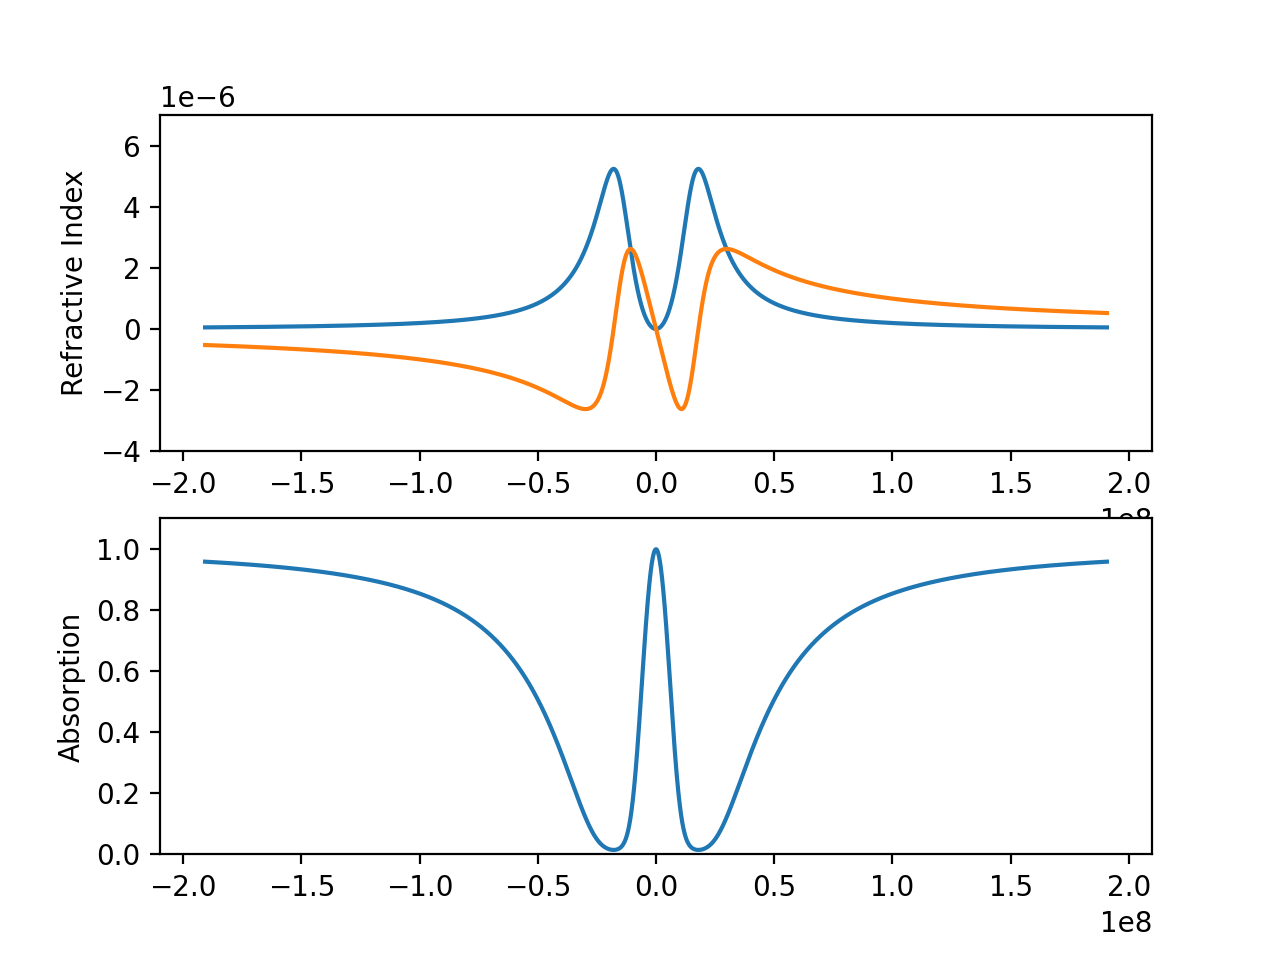

interactive(children=(FloatSlider(value=7627786.962916018, description='Omegac', max=190694674.07290044, step=…

In [131]:
Gam = 2*pi*6.07e6
gam = Gam/10000
Omegas = Gam/100
Omegac = Gam/5
deltac = 0*Gam/10
deltas = np.linspace(-5*Gam, 5*Gam, 10000)
Deltas = deltas - 1j*Gam/2
DeltaR = deltas - deltac - 1j*gam



P = 200/(Deltas - Omegac**2/(4*DeltaR))
Es = 1

ns = 1+ P/2/Es
lam = 780e-9
z = 1e-1
A = np.exp(-2*pi*np.imag(ns)*z/lam)


def update(Omegac = Gam/5):
    P = 200/(Deltas - Omegac**2/(4*DeltaR))
    ns = 1+ P/2/Es
    A = np.exp(-2*pi*np.imag(ns)*z/lam)
    line0.set_ydata(np.imag(ns)) 
    line1.set_ydata(np.real(ns)-1) 
    line2.set_ydata(A) 
    
    
fig, (ax1,ax2) = plt.subplots(2)
dummy_n = np.zeros_like(deltas)
line0, = ax1.plot(deltas, dummy_n, label = 'Real')
line1, = ax1.plot(deltas, dummy_n, label = 'Imag')
line2, = ax2.plot(deltas, dummy_n, label = 'Imag')

ax1.set_ylabel('Refractive Index')
ax2.set_ylabel('Absorption')
ax1.set_ylim(-0.4e-5, 0.7e-5)
ax2.set_ylim(0, 1.1)


ipw.interact(update, Omegac = (0, 5*Gam, Gam/100))

#plt.plot(z,I2)
plt.show()

## Quantum Picture
The Hamiltonian describing the atom-field interaction in the absence of damping may be written in the rotating frame as 
\begin{equation}
-\frac{\hbar}{2}\left[ \begin{array}{ccc}
0 & \Omega_s &  0 \\
\Omega_s & -2\Delta_1 & \Omega_c \\
0 & \Omega_c & -2(\Delta_1 - \Delta_3) \end{array} \right],
\end{equation}
where $\Omega_s$ and $\Omega_c$ are the Rabi frequencies induced by the signal and coupling fields respectively, and $\Delta_1$ and $\Delta_3$ represent the signal and coupling field detunings from optical resonance.  When the two photon detuning is zero ($\Delta_1=\Delta_3$), we obtain eigenvalues of $\{0, \hbar/2(\Delta_1 \pm \Omega_N)\}$, where we have defined a normalizing Rabi frequency $\Omega_N \equiv \sqrt{\Omega_c^2+\Omega_s^2}$. The vanishing energy eigenvalue corresponds to the case in which no atom field coupling exists and has an eigenvector of
\begin{equation}
|-\rangle =  \frac{\Omega_c}{\Omega_N}|1\rangle - \frac{\Omega_s}{\Omega_N}|3\rangle.
\end{equation}

When the system is in this eigenstate, no absorption takes place and hence no spontaenous emission occurs.  For this reason, atoms prepared in this eigenstate are said to be in a dark state, invisible to radiation at the signal frequency.  

## Slow Light

Recall that the group velocity of light is defined as

\begin{align}
v_g &= \frac{d\omega}{dk}
\end{align}

Since $k = n(\omega)\omega/c$, we can define a group index of 
\begin{align}
n_g = n(\omega) + \omega\frac{dn(\omega)}{d\omega}
\end{align}

That measures how slow a pulse of light will propagate.

<IPython.core.display.Javascript object>


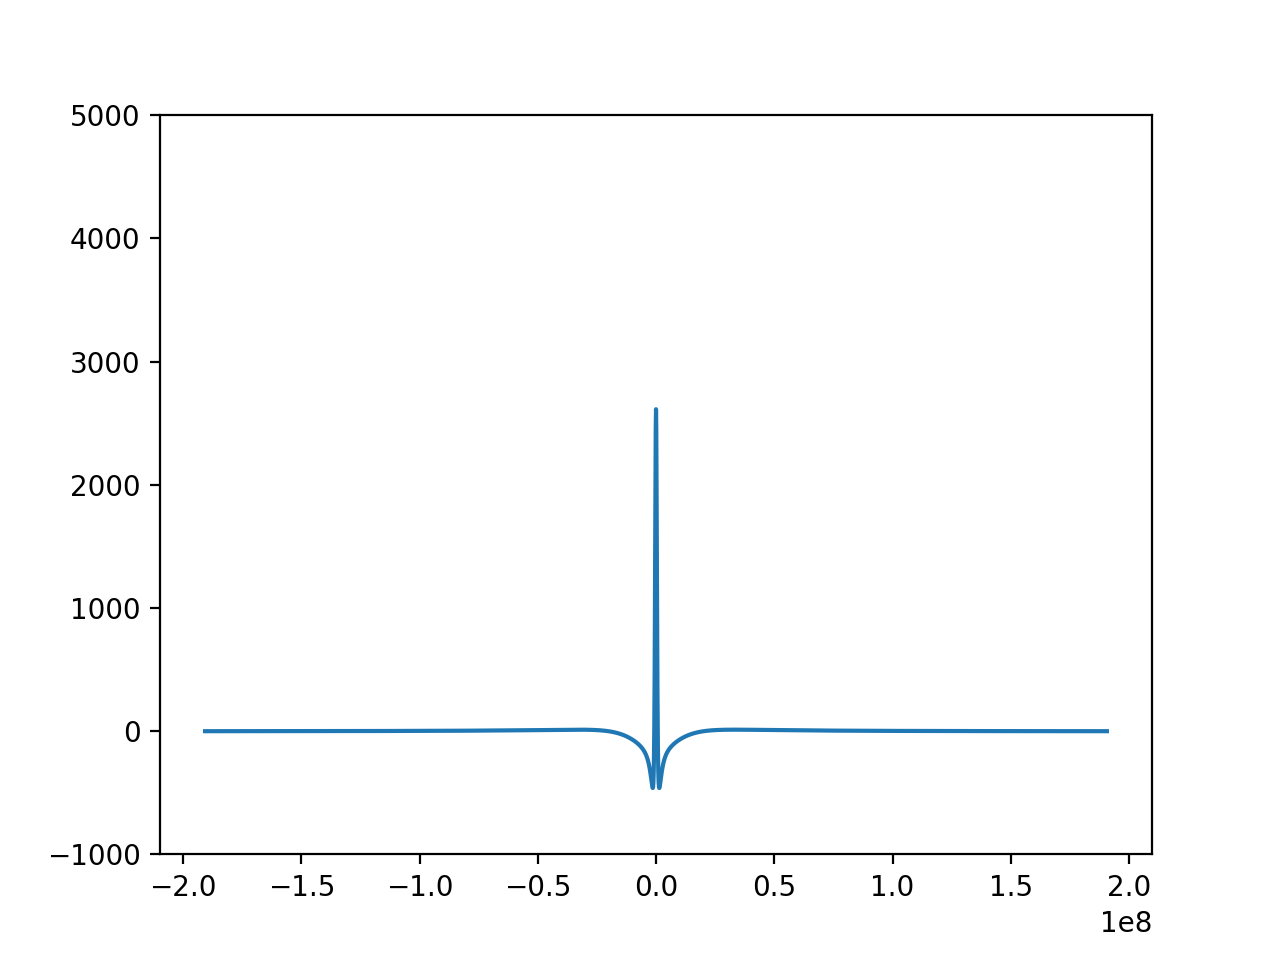

interactive(children=(FloatSlider(value=7627786.962916018, description='Omegac', max=38138934.81458009, step=3…

In [143]:
omegas = deltas +c/lam

def update(Omegac = Gam/5):
    P = 200/(Deltas - Omegac**2/(4*DeltaR))
    ns = 1+ P/2/Es
    A = np.exp(-2*pi*np.imag(ns)*z/lam)
    ng = np.real(ns[0:-1]) + omegas[0:-1]*np.diff(ns)/np.diff(omegas)
    line0.set_ydata(-ng) 
    
    
fig, ax = plt.subplots()
dummy_n = np.zeros_like(deltas[0:-1])
line0, = ax.plot(deltas[0:-1], dummy_n, label = 'vg')

ax.set_ylim(-1000, 5000)



ipw.interact(update, Omegac = (0, Gam, Gam/100))

#plt.plot(z,I2)
plt.show()

One of my first papers used this effect to slow down images encoded in single photons:
[All-Optical Delay of Images using Slow Light](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.98.043902)